# 学習したモデルから予測をするテスト

In [1]:
import tensorflow as tf
import model
import model_input
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
  with tf.Graph().as_default() as g:
    # Get images and labels for CIFAR-10.
    eval_data = True
    images, labels = model.inputs(eval_data=eval_data)

    # Build a Graph that computes the logits predictions from the
    # inference model.
    logits = model.inference(images)

    # Calculate predictions.
    top_k_op = tf.nn.in_top_k(logits, labels, 1)

    # Restore the moving average version of the learned variables for eval.
    variable_averages = tf.train.ExponentialMovingAverage(
        model.MOVING_AVERAGE_DECAY)
    variables_to_restore = variable_averages.variables_to_restore()
    saver = tf.train.Saver(variables_to_restore)

    # eval
    with tf.Session() as sess:
        ckpt = tf.train.get_checkpoint_state('/tmp/my_cifar10_train')
        saver.restore(sess, ckpt.model_checkpoint_path)

NotFoundError: Tensor name "fc6/biases/ExponentialMovingAverage" not found in checkpoint files /tmp/my_cifar10_train/model.ckpt-1100
	 [[Node: save/restore_slice_10 = RestoreSlice[dt=DT_FLOAT, preferred_shard=-1, _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/restore_slice_10/tensor_name, save/restore_slice_10/shape_and_slice)]]
Caused by op 'save/restore_slice_10', defined at:
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/nipe/.local/lib/python3.4/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/nipe/.local/lib/python3.4/site-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/Users/nipe/.local/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/zmq/eventloop/ioloop.py", line 151, in start
    super(ZMQIOLoop, self).start()
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tornado/ioloop.py", line 866, in start
    handler_func(fd_obj, events)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/zmq/eventloop/zmqstream.py", line 433, in _handle_events
    self._handle_recv()
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/zmq/eventloop/zmqstream.py", line 465, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/zmq/eventloop/zmqstream.py", line 407, in _run_callback
    callback(*args, **kwargs)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/nipe/.local/lib/python3.4/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/nipe/.local/lib/python3.4/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/nipe/.local/lib/python3.4/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/Users/nipe/.local/lib/python3.4/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/nipe/.local/lib/python3.4/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/nipe/.local/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/nipe/.local/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/nipe/.local/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-fd22f8cabcc7>", line 17, in <module>
    saver = tf.train.Saver(variables_to_restore)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tensorflow/python/training/saver.py", line 861, in __init__
    restore_sequentially=restore_sequentially)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tensorflow/python/training/saver.py", line 519, in build
    filename_tensor, vars_to_save, restore_sequentially, reshape)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tensorflow/python/training/saver.py", line 272, in _AddRestoreOps
    values = self.restore_op(filename_tensor, vs, preferred_shard)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tensorflow/python/training/saver.py", line 187, in restore_op
    preferred_shard=preferred_shard)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tensorflow/python/ops/io_ops.py", line 203, in _restore_slice
    preferred_shard, name=name)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tensorflow/python/ops/gen_io_ops.py", line 359, in _restore_slice
    preferred_shard=preferred_shard, name=name)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tensorflow/python/framework/op_def_library.py", line 703, in apply_op
    op_def=op_def)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tensorflow/python/framework/ops.py", line 2317, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tensorflow/python/framework/ops.py", line 1239, in __init__
    self._traceback = _extract_stack()


In [ ]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    tf.train.start_queue_runners(sess)
    img = sess.run(float_image)
    images, _ = model_input.inputs(eval_data=True, data_dir='./../data/input', batch_size=1)
    sess.run(images)

In [5]:
sess = tf.Session()
ckpt = tf.train.get_checkpoint_state('/tmp/my_cifar10_train')
variable_averages = tf.train.ExponentialMovingAverage(model.MOVING_AVERAGE_DECAY)
variables_to_restore = variable_averages.variables_to_restore()
saver = tf.train.Saver(variables_to_restore)
saver.restore(sess, ckpt.model_checkpoint_path)

NotFoundError: Tensor name "conv4/weights/ExponentialMovingAverage" not found in checkpoint files /tmp/my_cifar10_train/model.ckpt-1100
	 [[Node: save_1/restore_slice_7 = RestoreSlice[dt=DT_FLOAT, preferred_shard=-1, _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_1/Const_0, save_1/restore_slice_7/tensor_name, save_1/restore_slice_7/shape_and_slice)]]
Caused by op 'save_1/restore_slice_7', defined at:
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/nipe/.local/lib/python3.4/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/nipe/.local/lib/python3.4/site-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/Users/nipe/.local/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/zmq/eventloop/ioloop.py", line 151, in start
    super(ZMQIOLoop, self).start()
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tornado/ioloop.py", line 866, in start
    handler_func(fd_obj, events)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/zmq/eventloop/zmqstream.py", line 433, in _handle_events
    self._handle_recv()
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/zmq/eventloop/zmqstream.py", line 465, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/zmq/eventloop/zmqstream.py", line 407, in _run_callback
    callback(*args, **kwargs)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/nipe/.local/lib/python3.4/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/nipe/.local/lib/python3.4/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/nipe/.local/lib/python3.4/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/Users/nipe/.local/lib/python3.4/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/nipe/.local/lib/python3.4/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/nipe/.local/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/nipe/.local/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/nipe/.local/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-c2570b25c6a6>", line 5, in <module>
    saver = tf.train.Saver(variables_to_restore)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tensorflow/python/training/saver.py", line 861, in __init__
    restore_sequentially=restore_sequentially)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tensorflow/python/training/saver.py", line 519, in build
    filename_tensor, vars_to_save, restore_sequentially, reshape)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tensorflow/python/training/saver.py", line 272, in _AddRestoreOps
    values = self.restore_op(filename_tensor, vs, preferred_shard)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tensorflow/python/training/saver.py", line 187, in restore_op
    preferred_shard=preferred_shard)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tensorflow/python/ops/io_ops.py", line 203, in _restore_slice
    preferred_shard, name=name)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tensorflow/python/ops/gen_io_ops.py", line 359, in _restore_slice
    preferred_shard=preferred_shard, name=name)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tensorflow/python/framework/op_def_library.py", line 703, in apply_op
    op_def=op_def)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tensorflow/python/framework/ops.py", line 2317, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/tensorflow/python/framework/ops.py", line 1239, in __init__
    self._traceback = _extract_stack()


In [2]:
# キューを作成
filename_queue = tf.train.string_input_producer(['./../data/input/one_cat.bin'])

# ファイル名のキューからサンプルを読む
read_input = model_input.read_cifar10(filename_queue)
reshaped_image = tf.cast(read_input.uint8image, tf.float32)

height = 64
width  = 64

# リサイズする
resized_image = tf.image.resize_image_with_crop_or_pad(reshaped_image, width, height)

# Subtract off the mean and divide by the variance of the pixels.
float_image = tf.image.per_image_whitening(resized_image)

In [3]:
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
tf.train.start_queue_runners(sess)
img = sess.run(float_image)

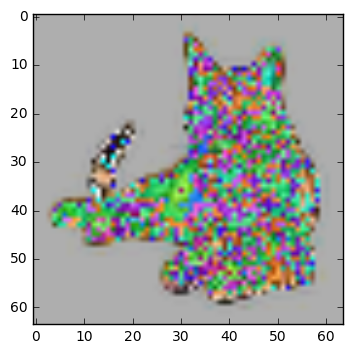

In [4]:
plt.imshow(img)

In [5]:
pred = sess.run(model.inference([img]))

ValueError: Argument must be a dense tensor: [array([[[ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971],
        ..., 
        [ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971]],

       [[ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971],
        ..., 
        [ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971]],

       [[ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971],
        ..., 
        [ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971]],

       ..., 
       [[ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971],
        ..., 
        [ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971]],

       [[ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971],
        ..., 
        [ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971]],

       [[ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971],
        ..., 
        [ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971],
        [ 0.68508971,  0.68508971,  0.68508971]]], dtype=float32)] - got shape [1, 64, 64, 3], but wanted [1].